In [24]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

could also test for correlation and make corr_matrix

In [2]:
file = "combined.csv"
df = pd.read_csv(file, index_col=0)

make histograms for different wavelengths / bands of wavelengths 

showing distribution of the 3 classes at different values of attenuation

choose the wavelengths with the least overlap / greatest contrast between classes

(is there a way to measure this analytically?)

could prioritise contrast between 2 classes over others 

e.g. prioritise contrast between 3 (neoplasia) and 2 (NDBE)

over 1 (squamous) & 2 (NDBE)

In [16]:
squamous = df.loc[df['label']==1]
ndbe = df.loc[df['label']==2]
neoplasia = df.loc[df['label']==3]

In [59]:
# squamous[['feature_1','label']]
print(f"1:{len(squamous)}, 2:{len(ndbe)}, 3:{len(neoplasia)}")

1:159, 2:320, 3:236


<Axes: >

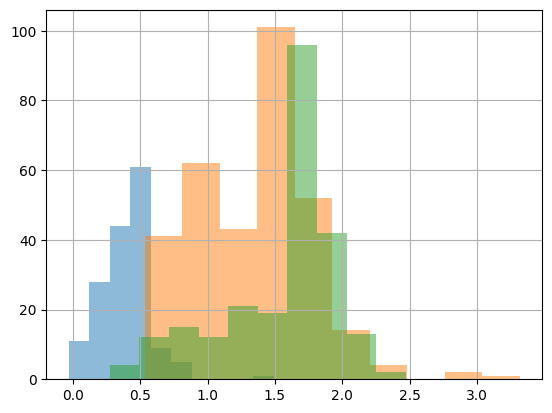

In [33]:
# make histo plot for each class (Rohit, 2014)
squamous['feature_1'].hist(alpha=0.5)
ndbe['feature_1'].hist(alpha=0.5)
neoplasia['feature_1'].hist(alpha=0.5)


In [29]:
df[['feature_1','label']]


,variable,value
0,feature_1,1.31130
1,feature_1,1.87500
2,feature_1,1.37820
3,feature_1,2.17140
4,feature_1,0.73976
...,...,...
310305,label,3.00000
310306,label,3.00000
310307,label,2.00000
310308,label,1.00000


c:\Users\sc19mhh\Desktop\Hamzah\Uni\CompSci\ThirdYear\FYP\MyCode\ML-cancer-detection\.venv\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


KeyboardInterrupt: 

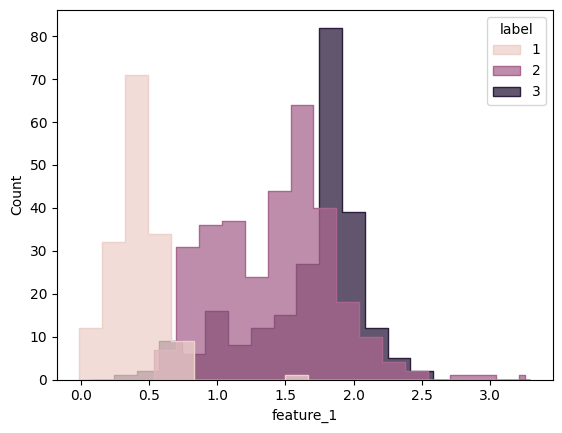

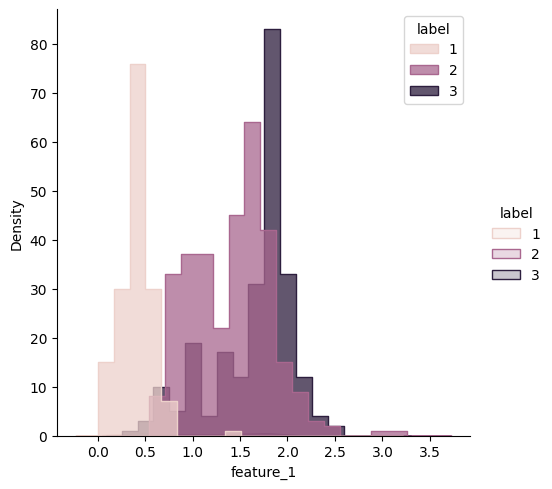

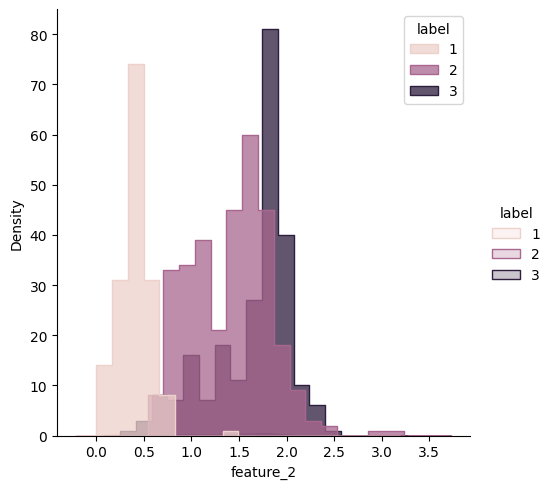

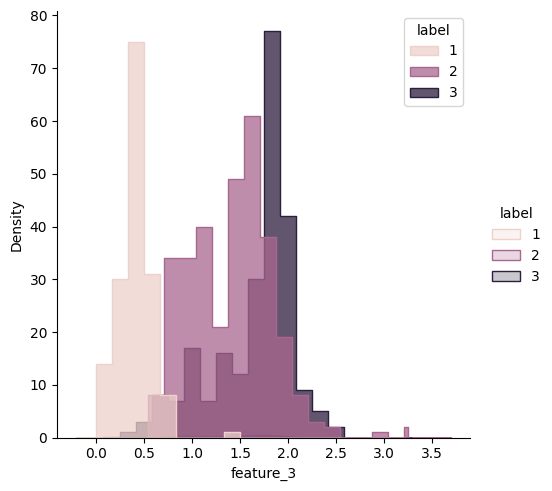

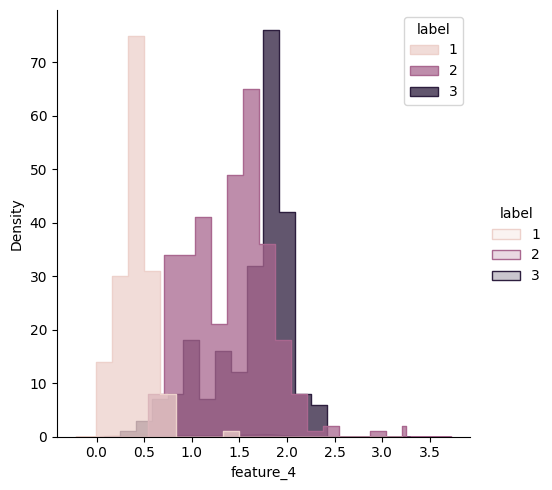

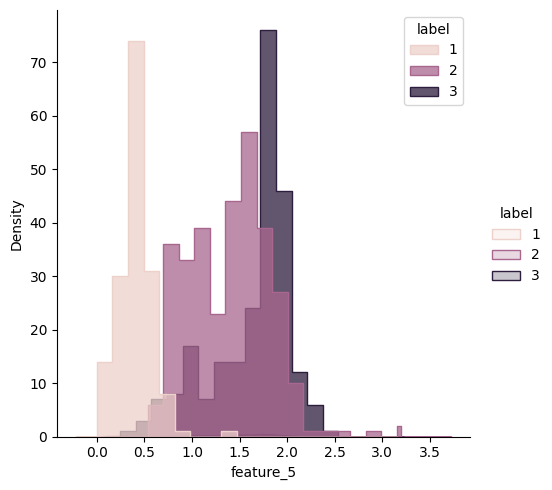

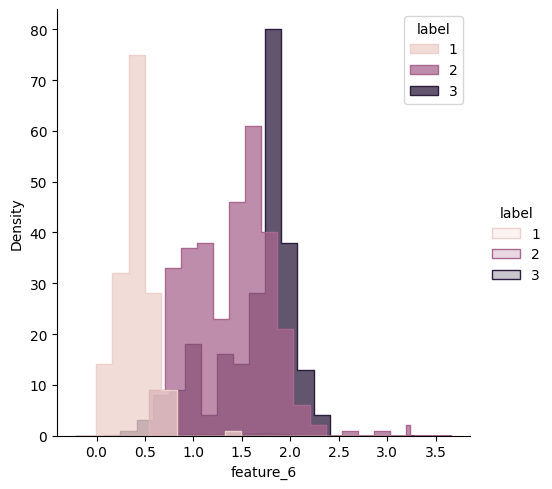

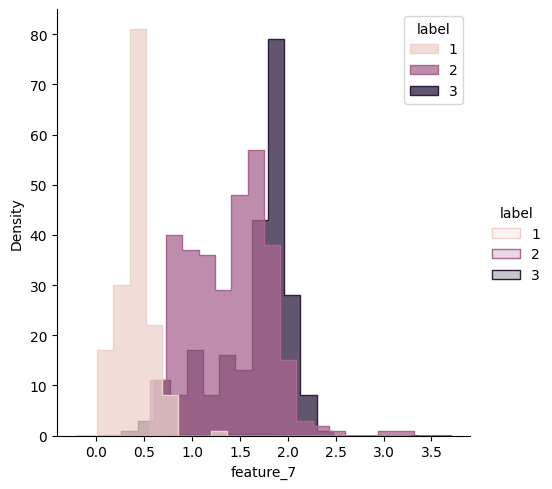

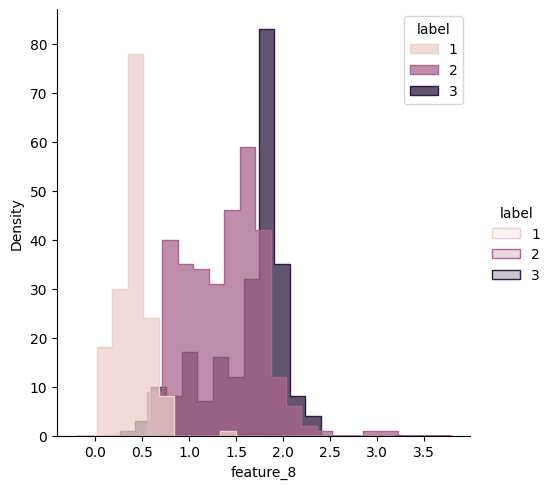

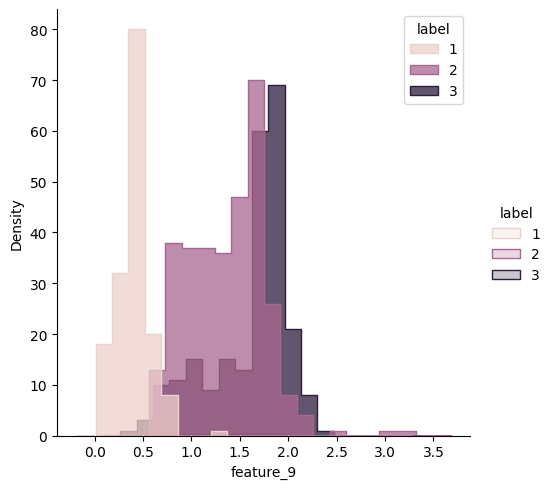

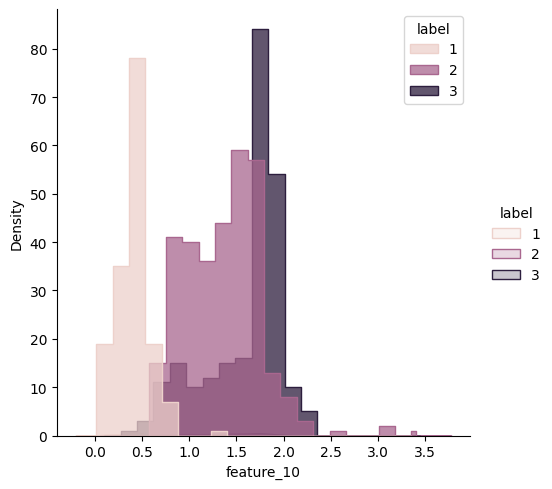

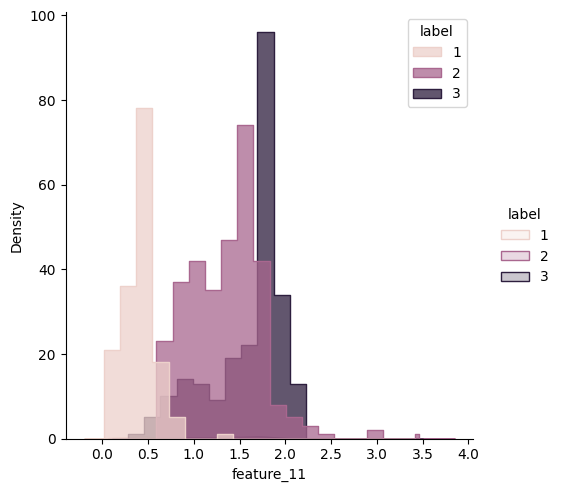

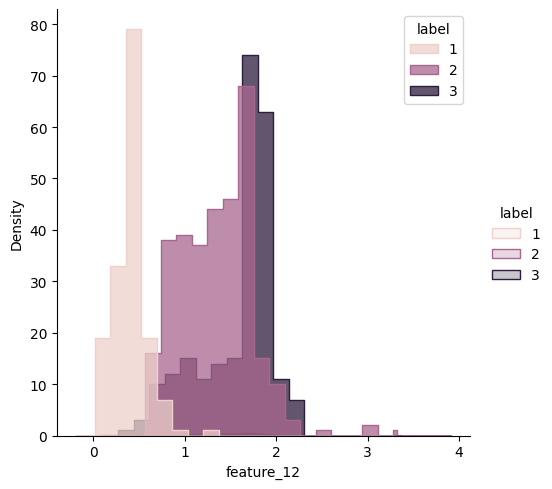

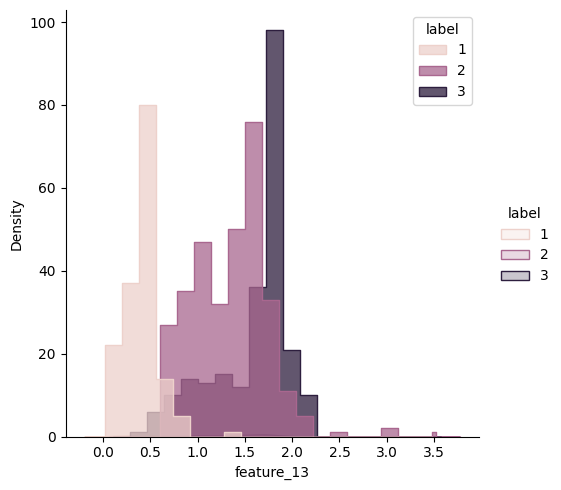

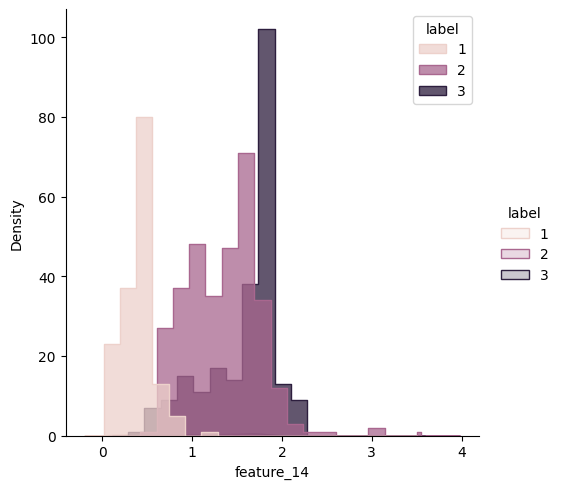

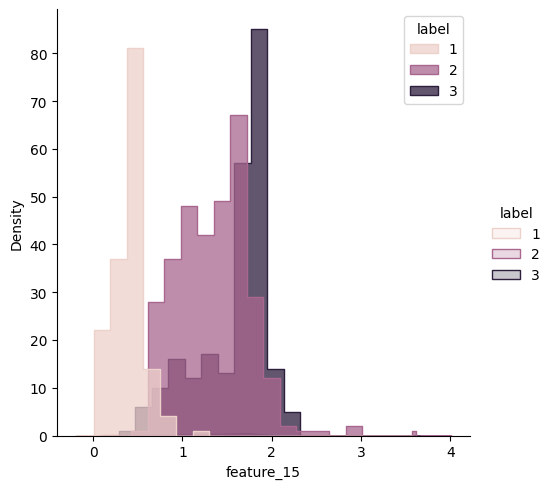

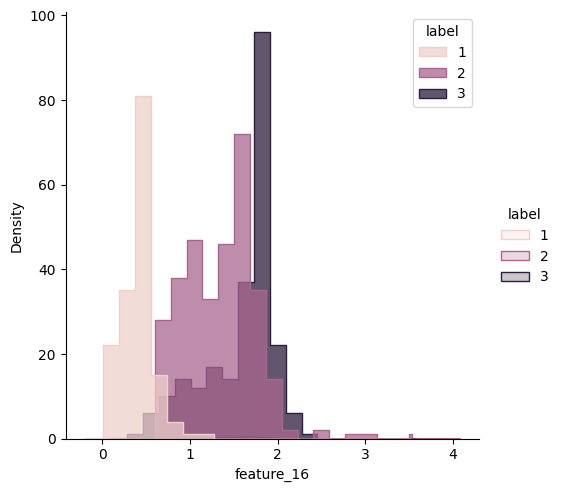

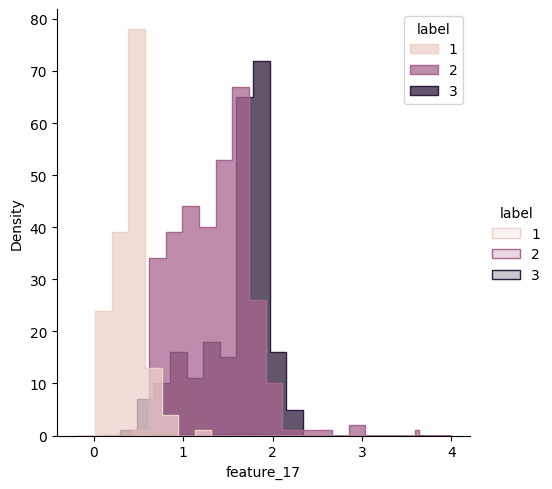

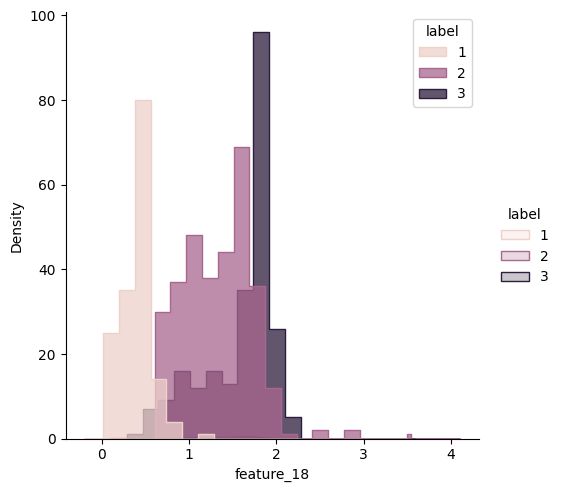

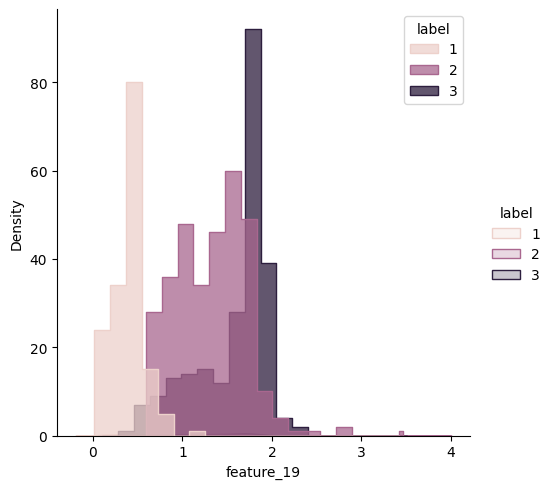

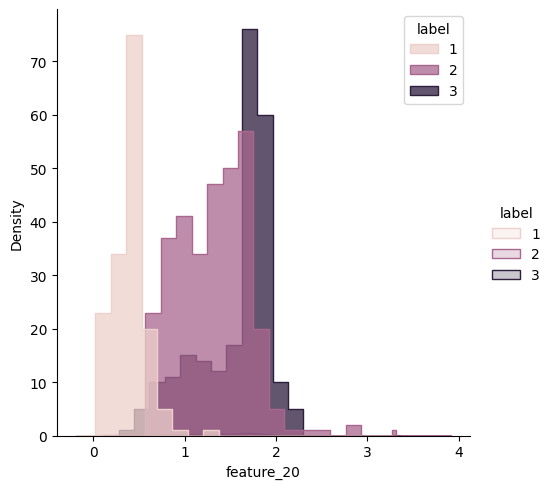

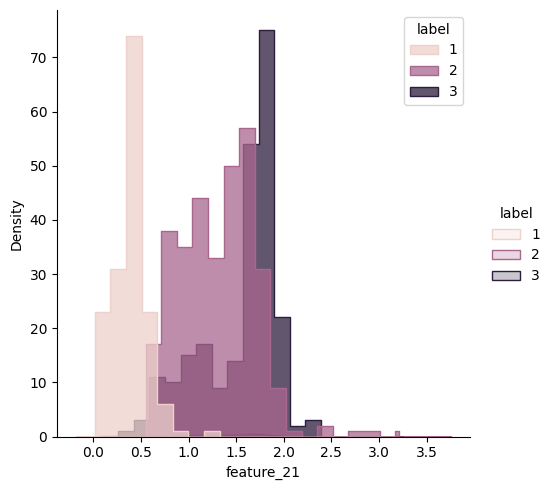

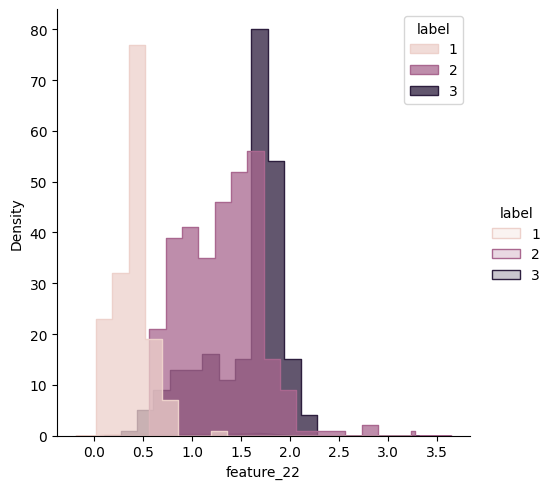

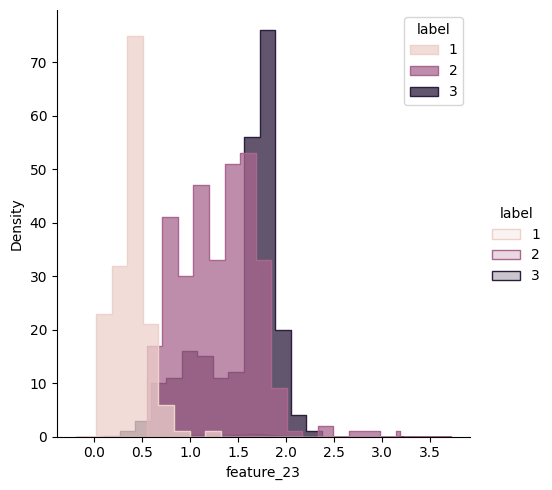

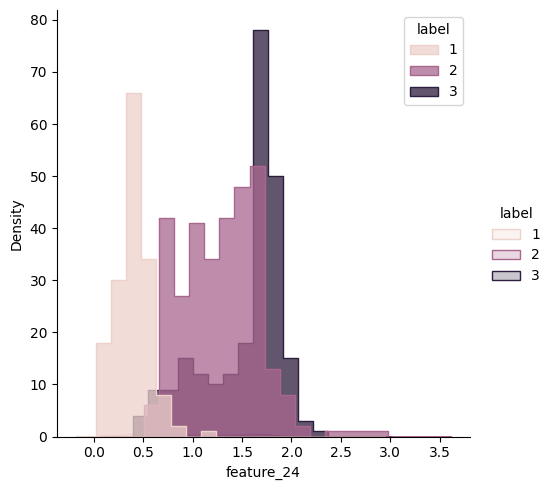

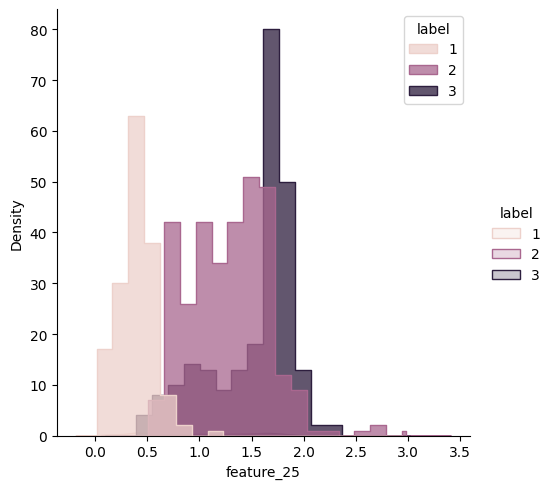

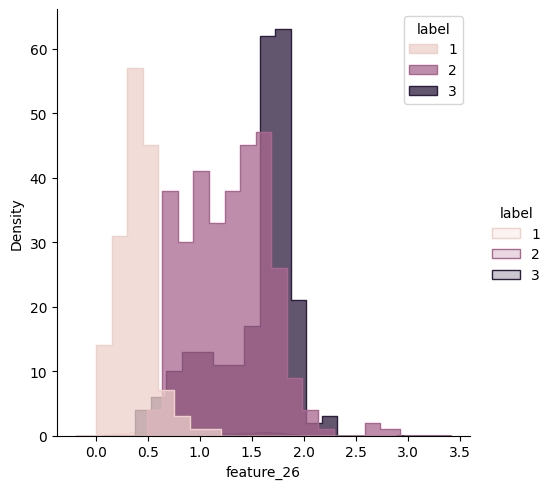

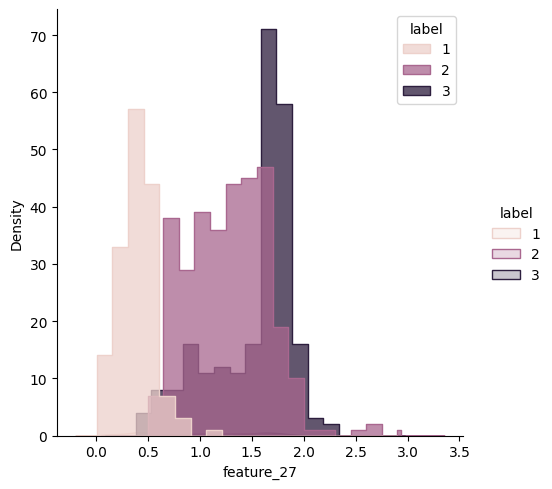

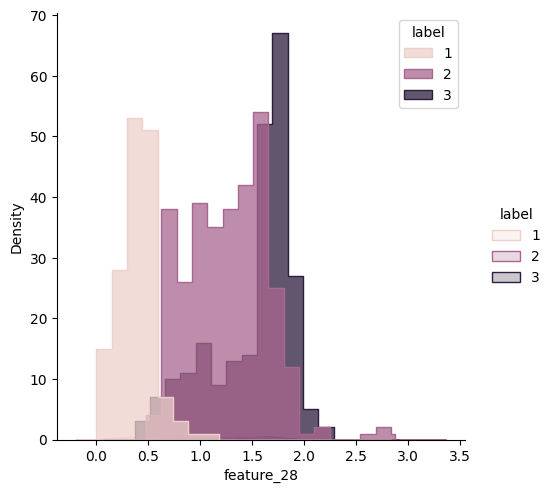

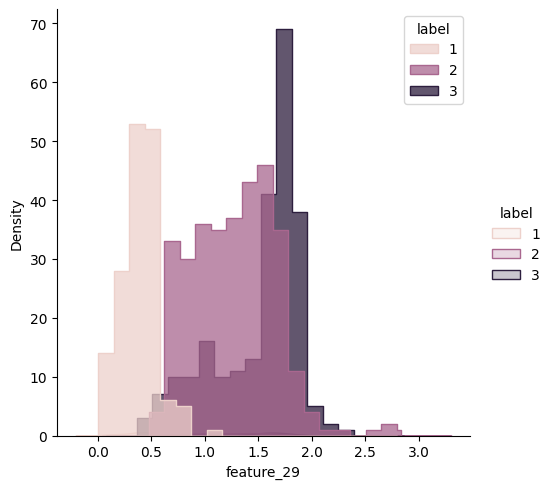

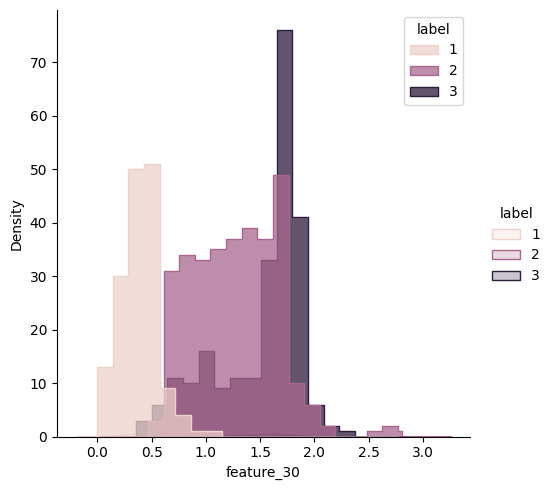

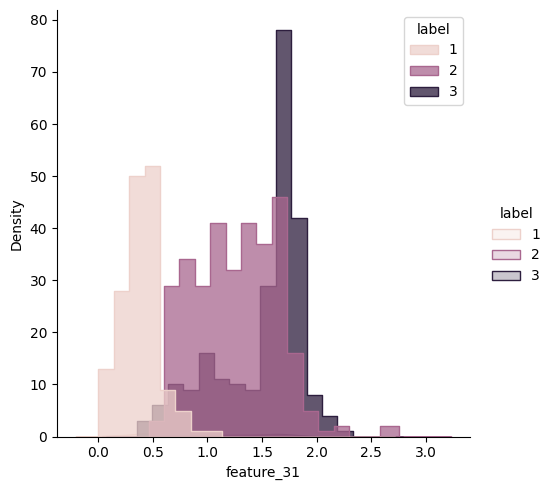

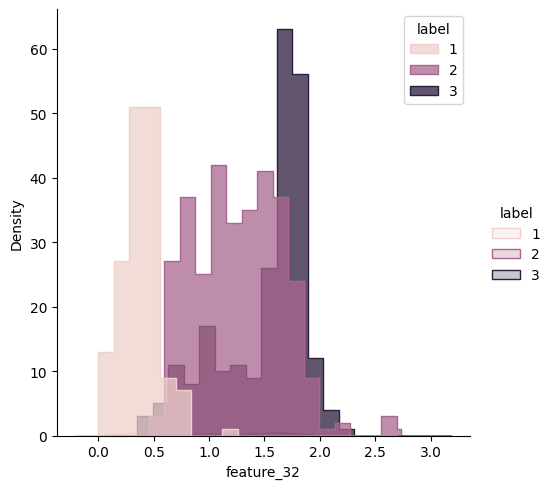

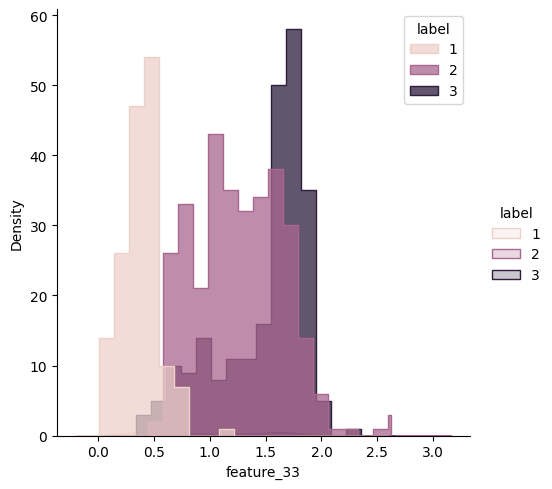

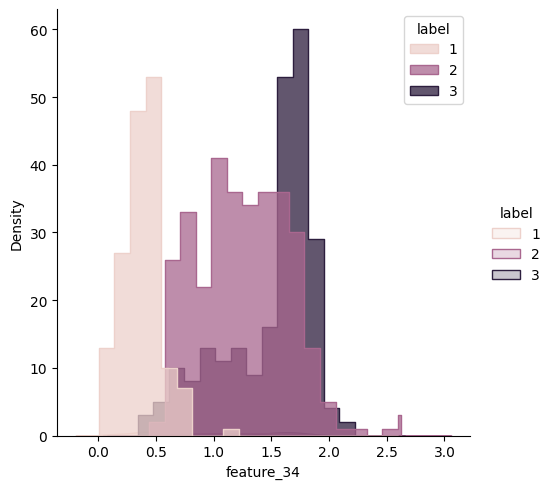

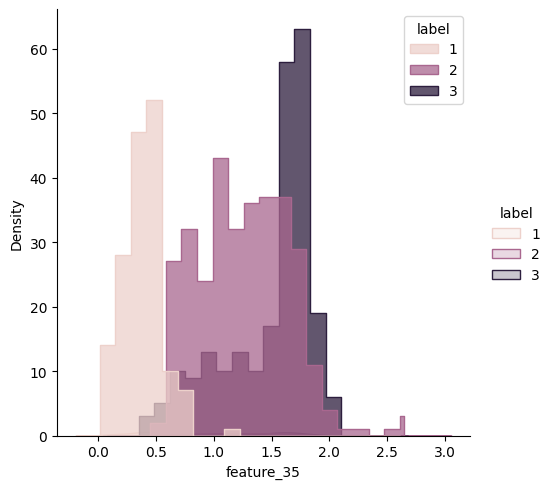

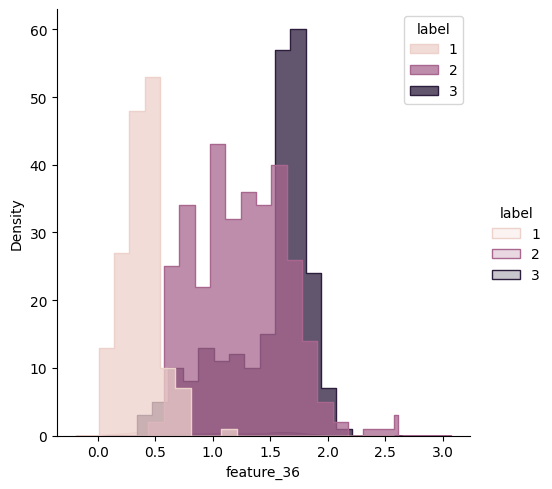

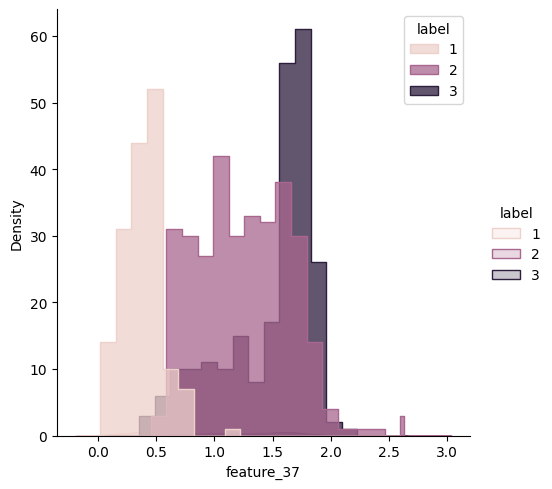

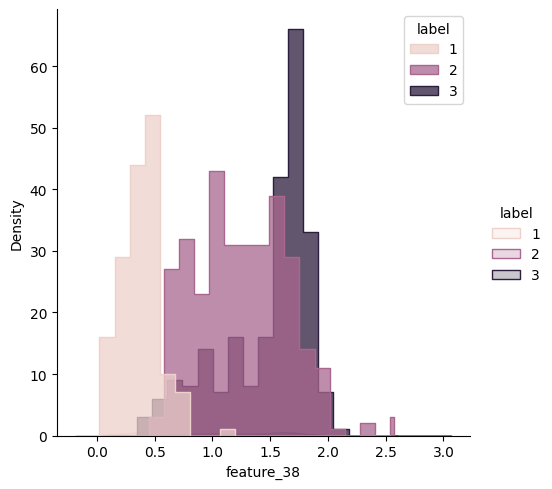

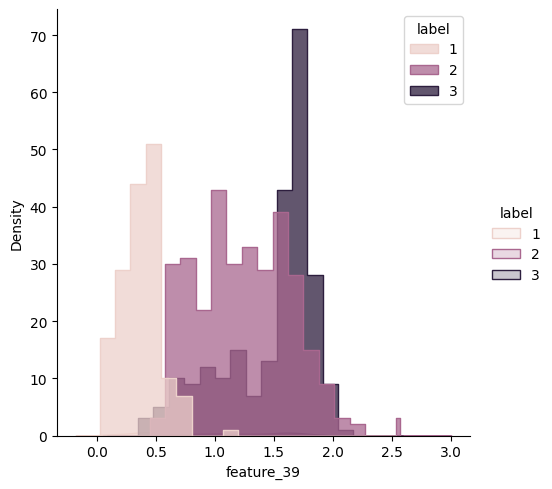

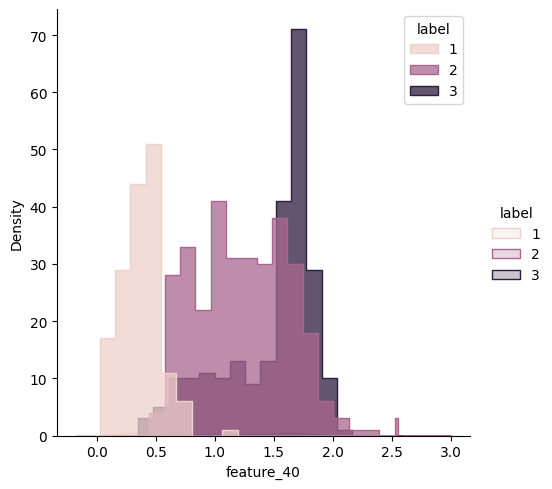

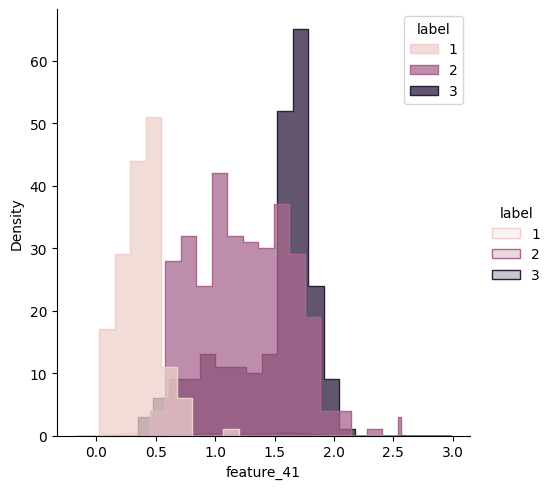

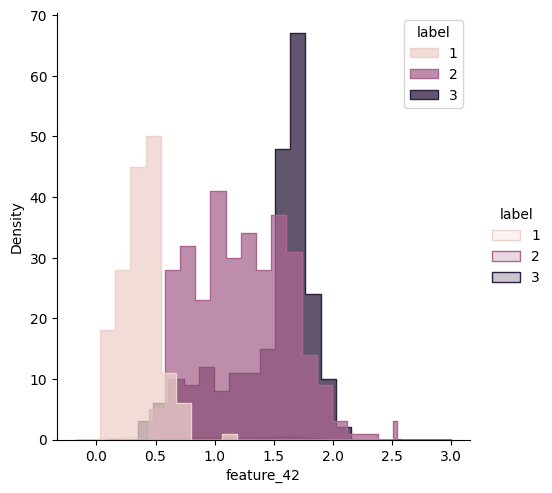

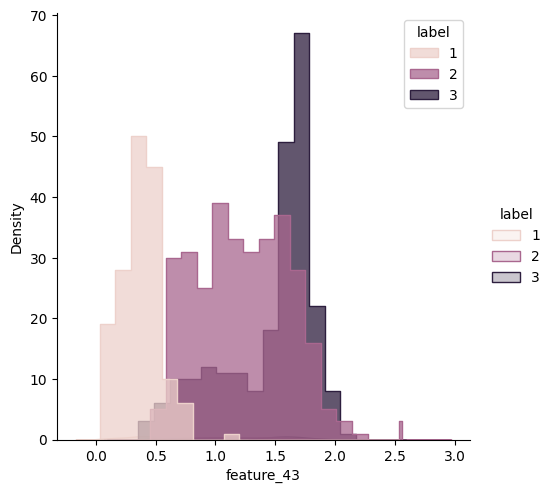

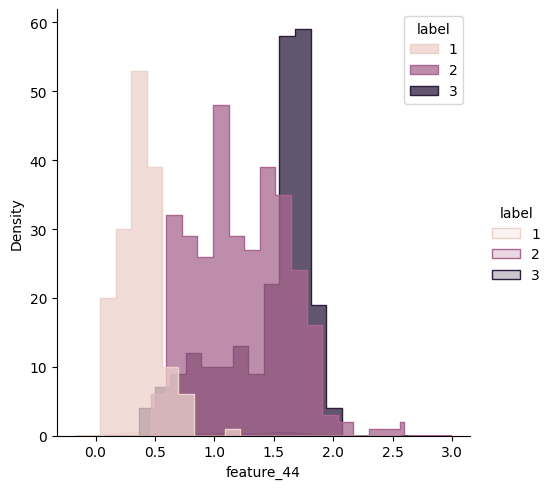

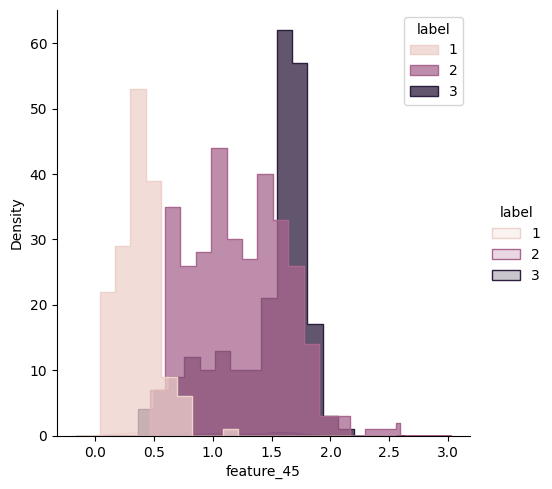

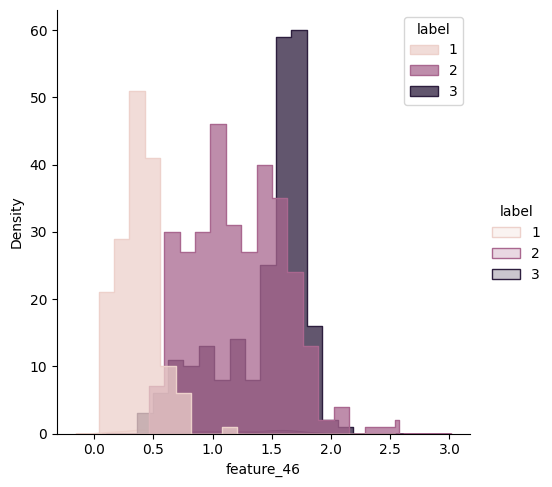

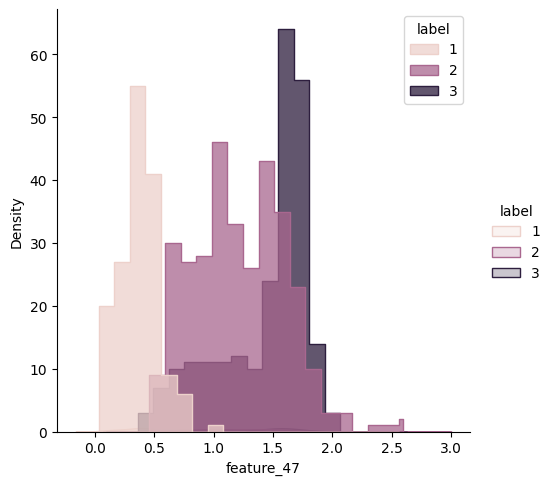

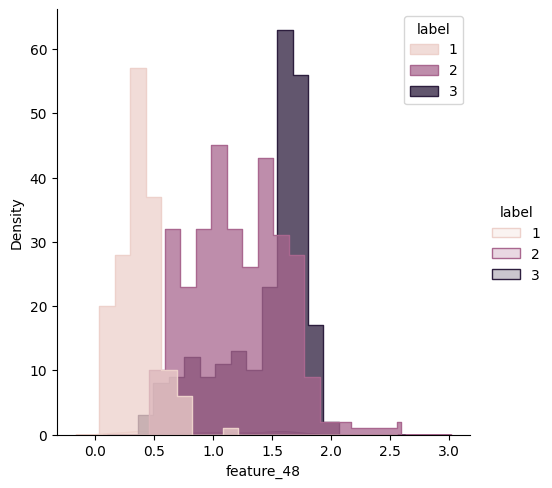

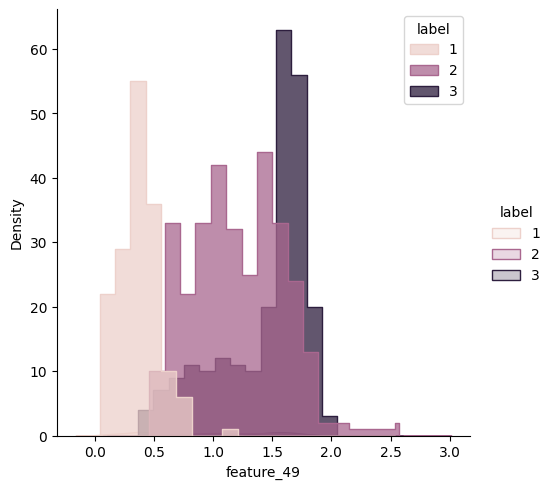

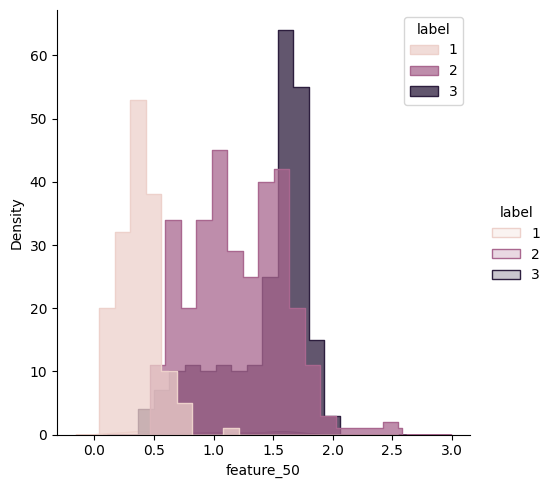

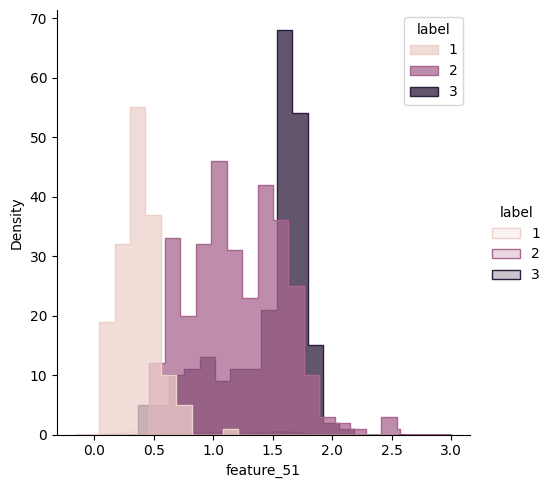

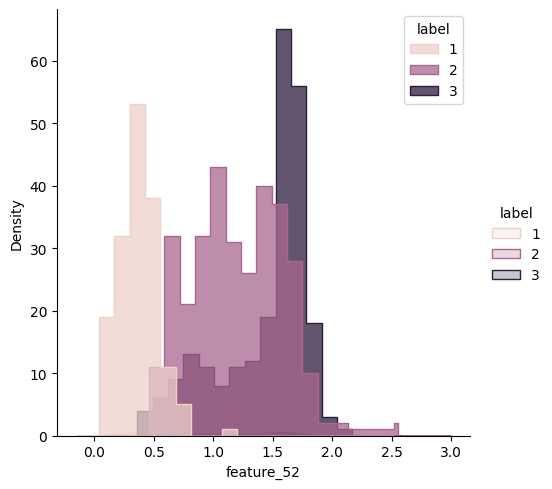

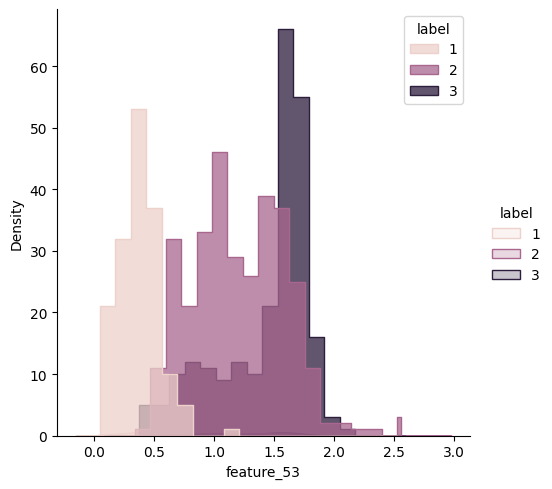

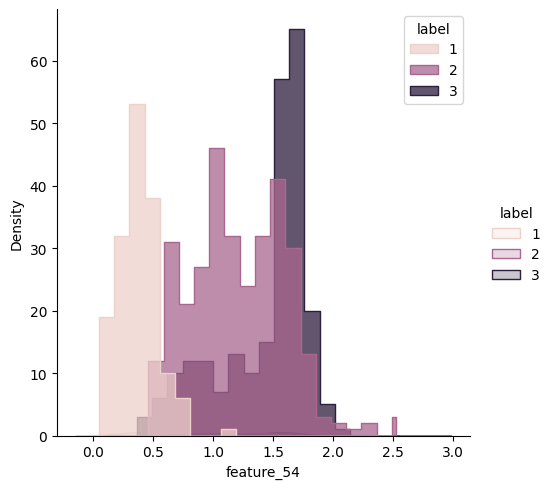

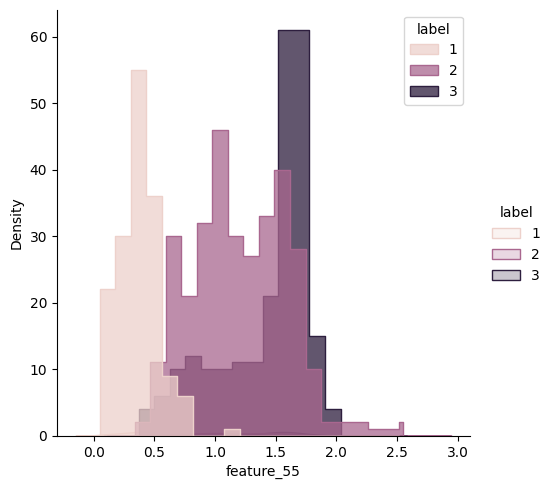

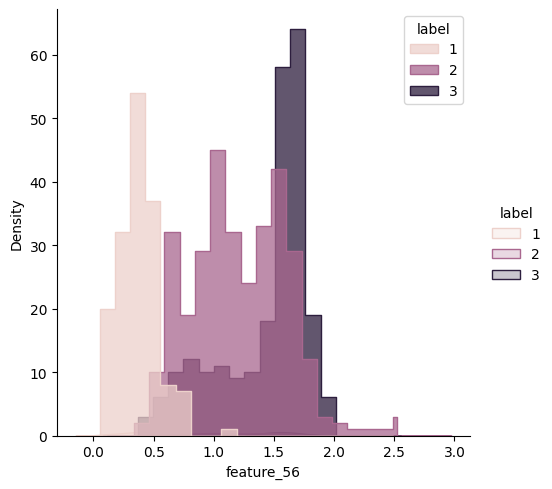

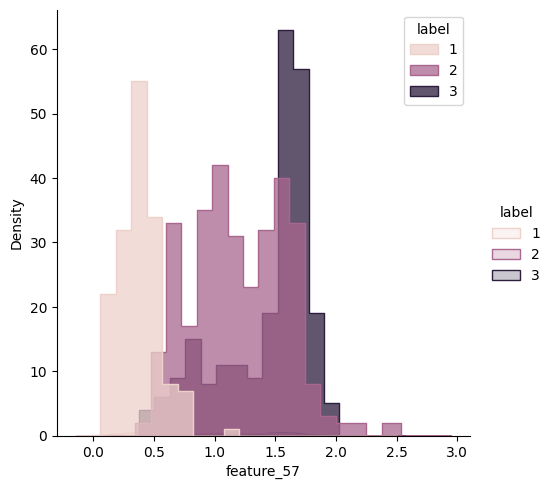

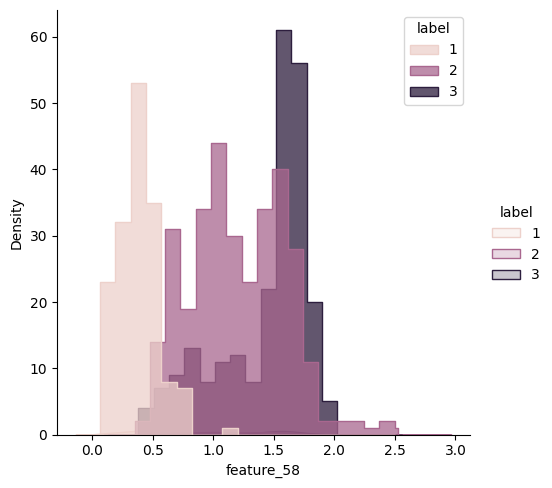

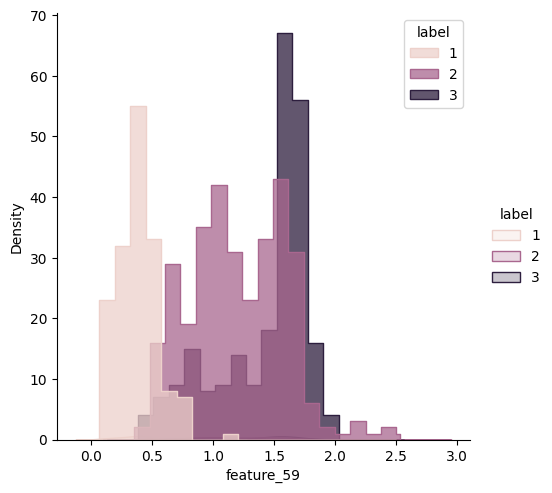

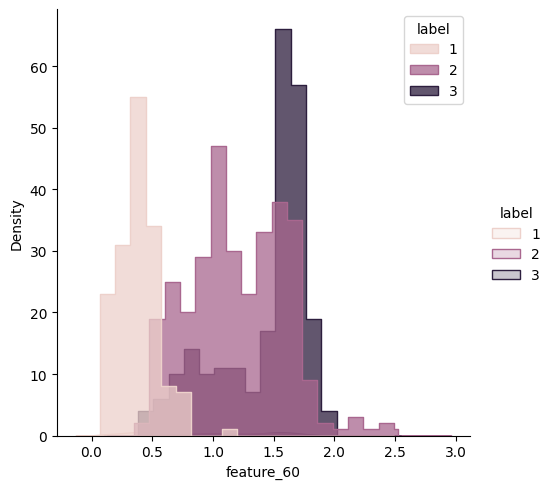

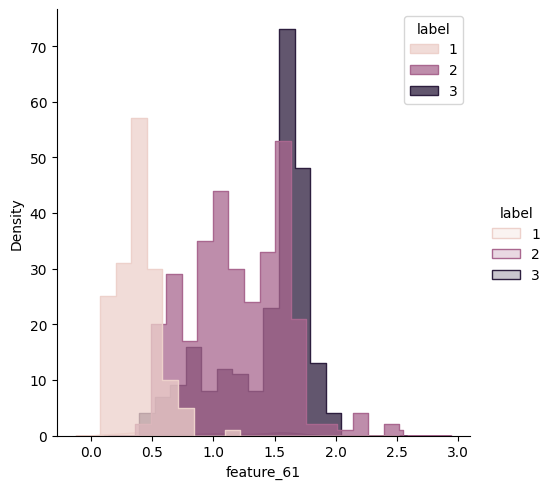

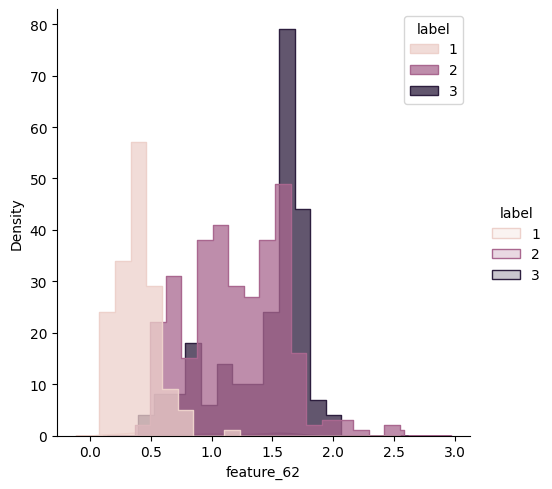

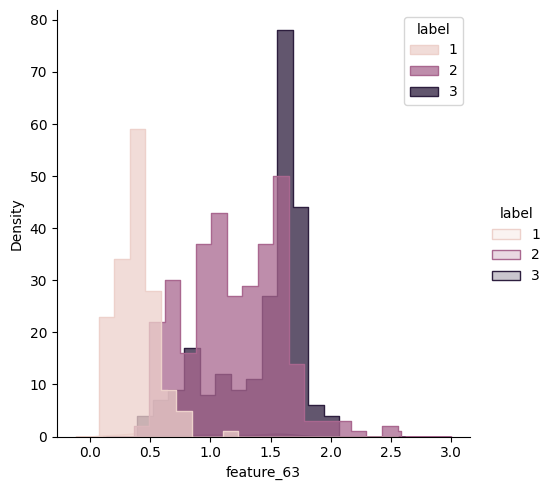

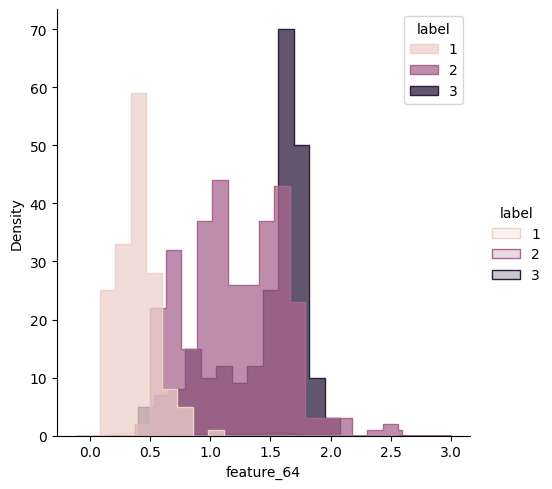

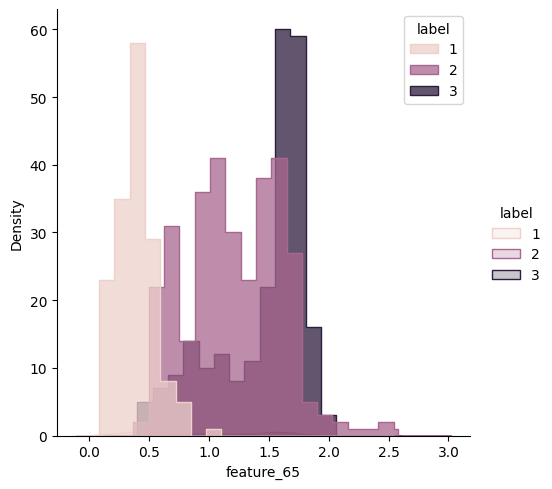

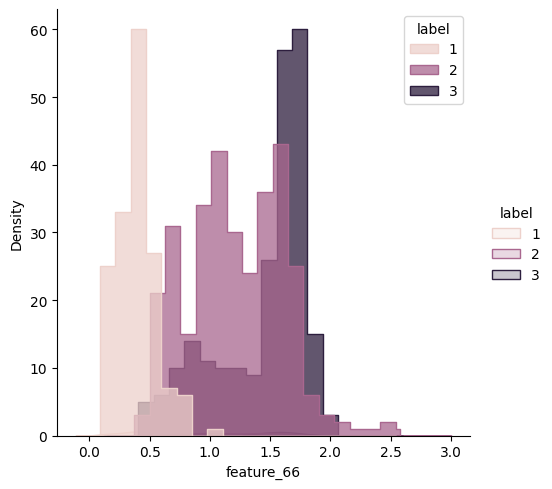

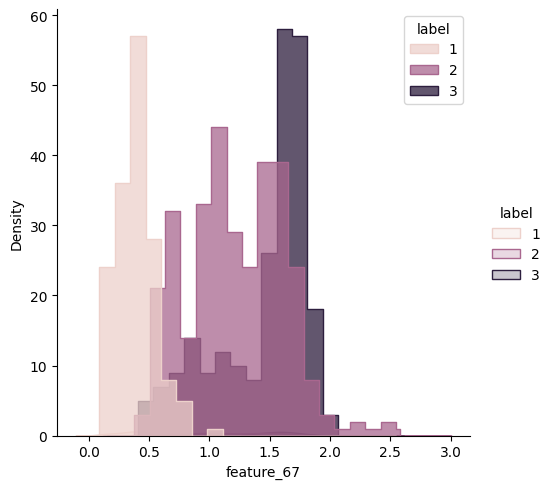

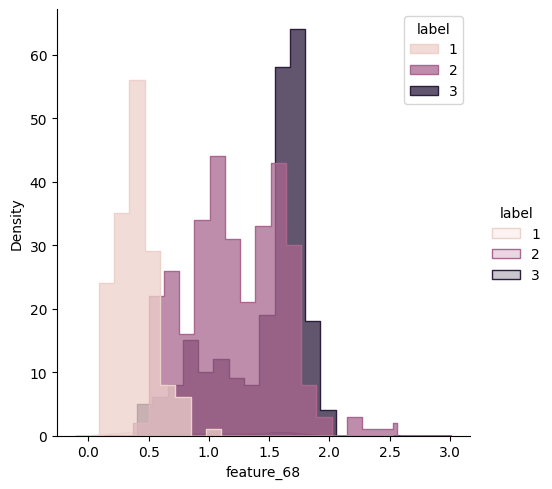

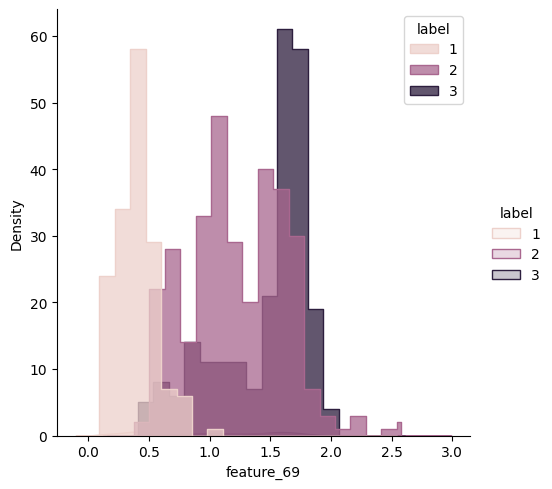

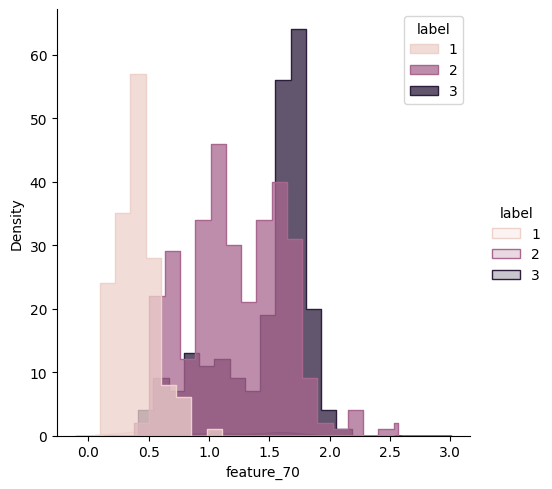

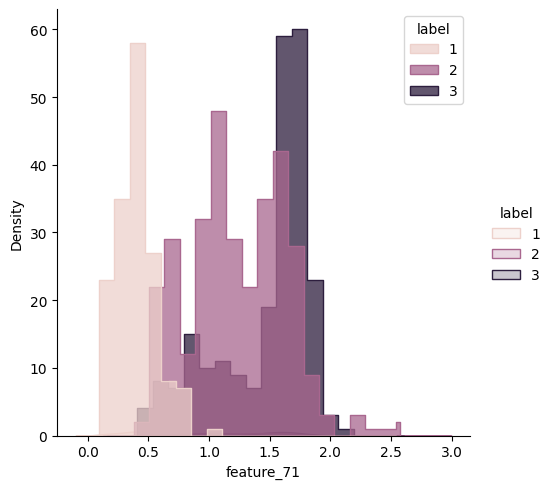

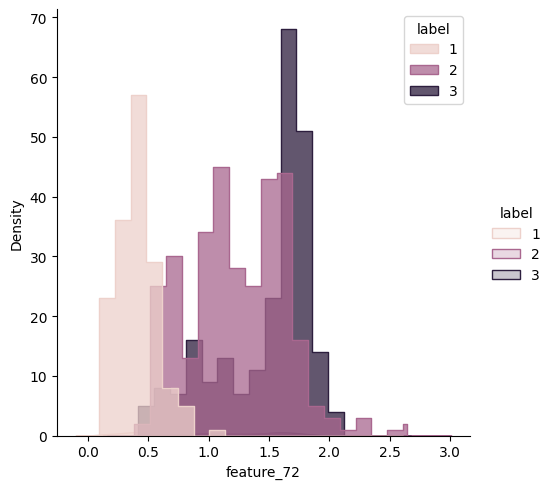

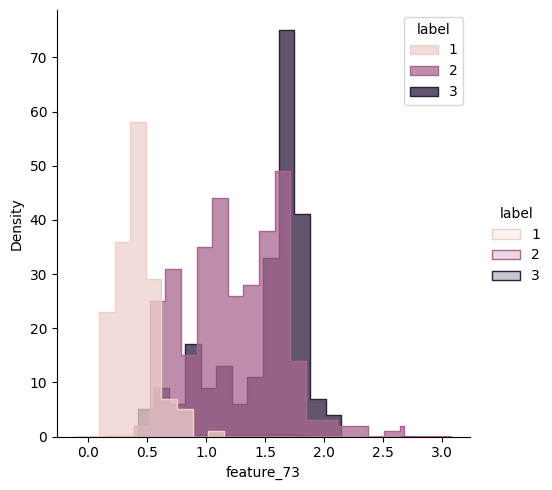

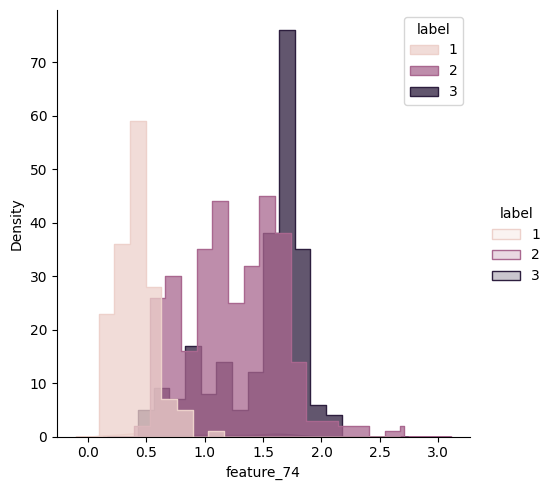

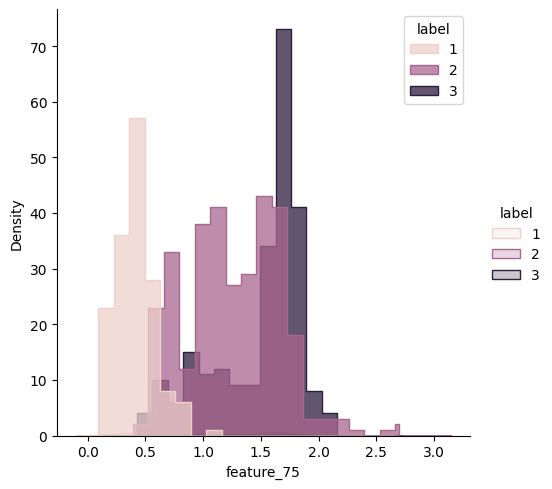

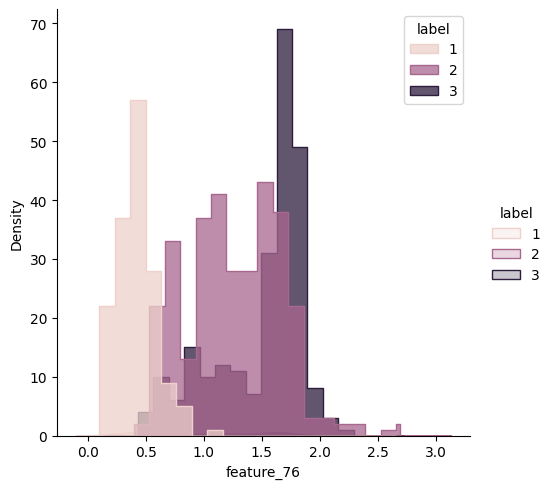

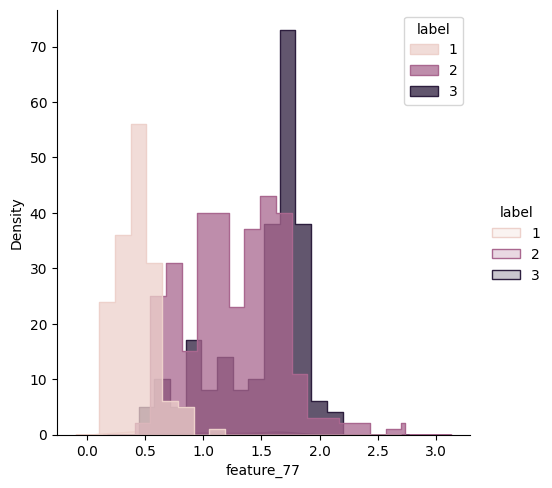

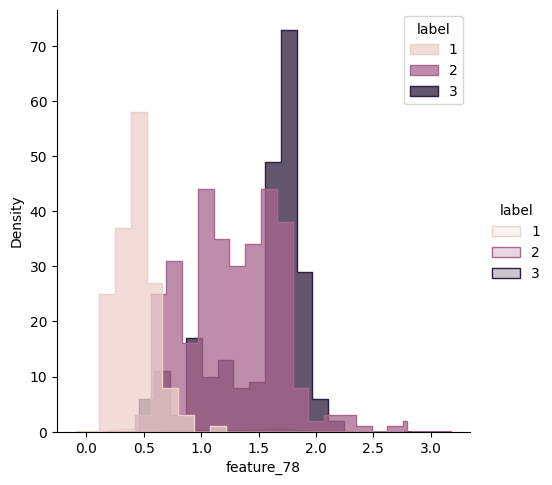

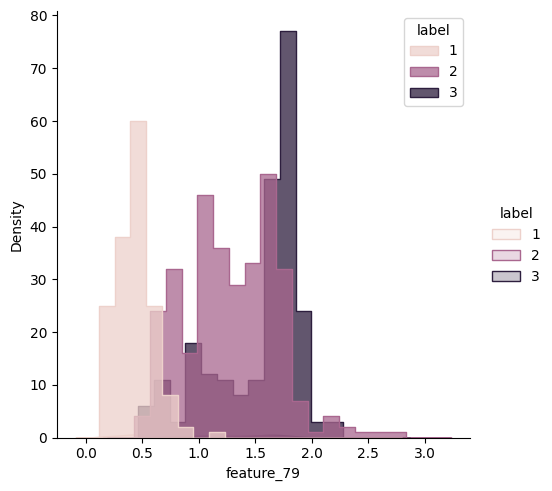

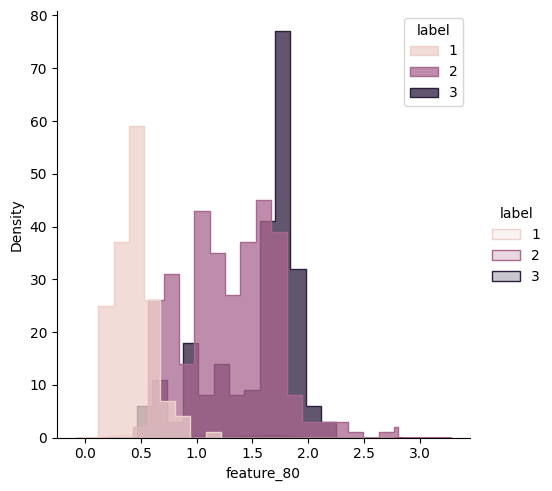

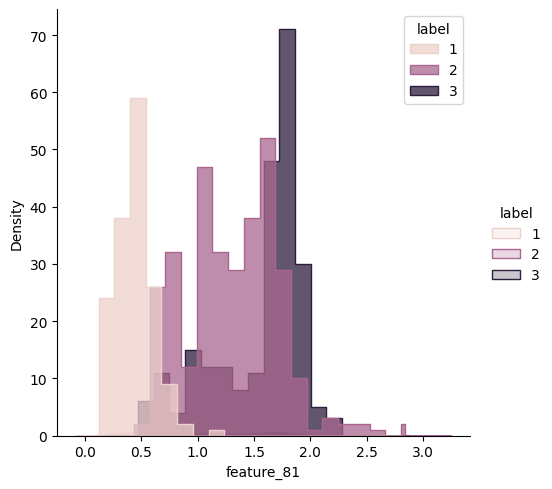

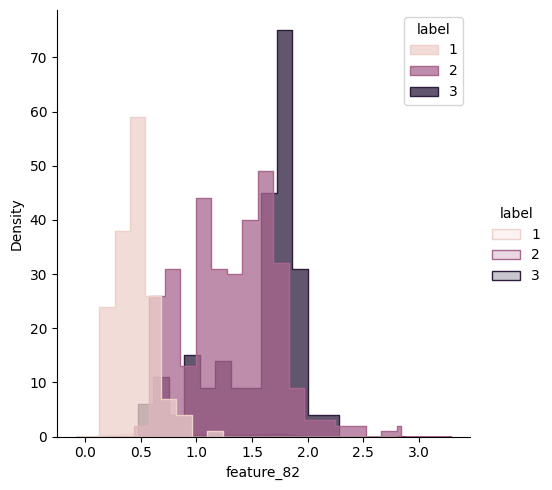

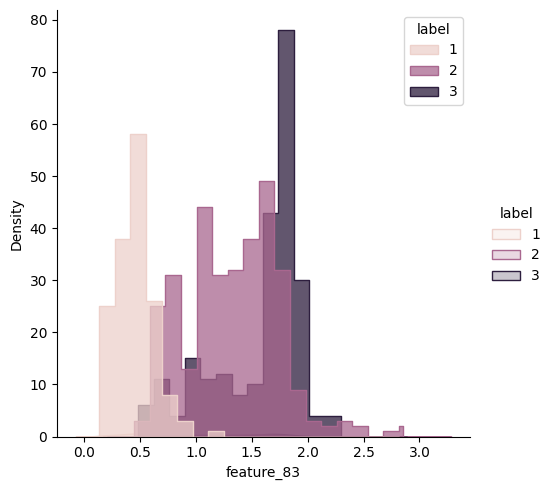

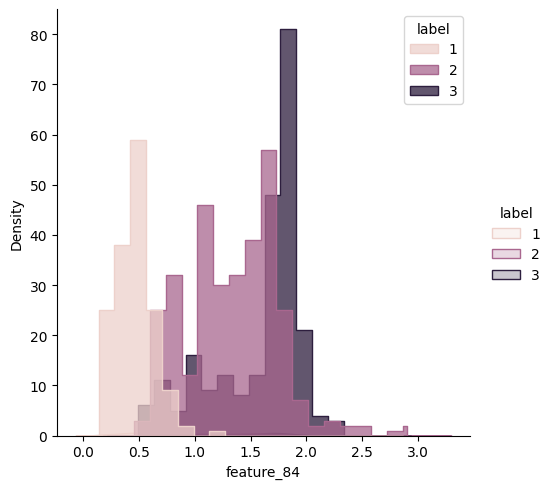

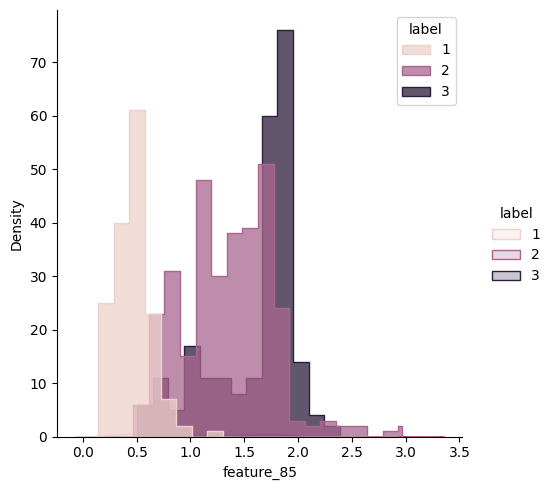

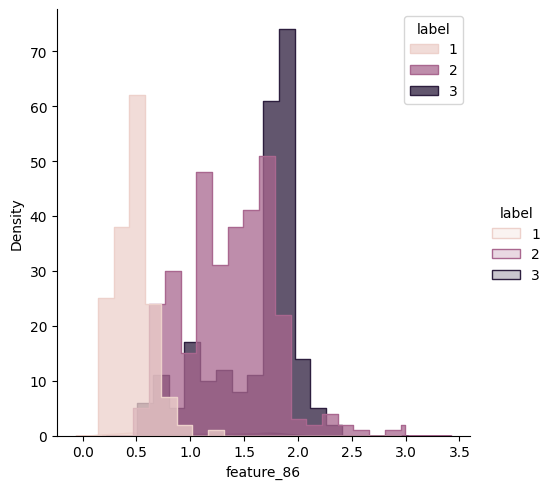

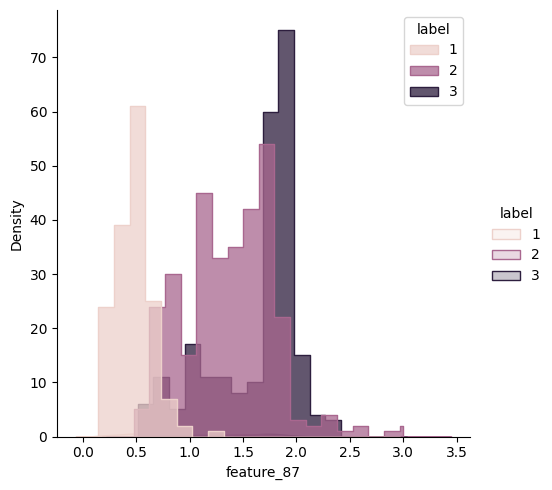

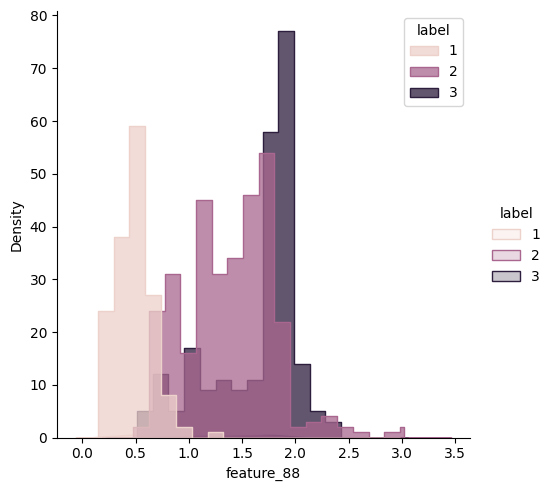

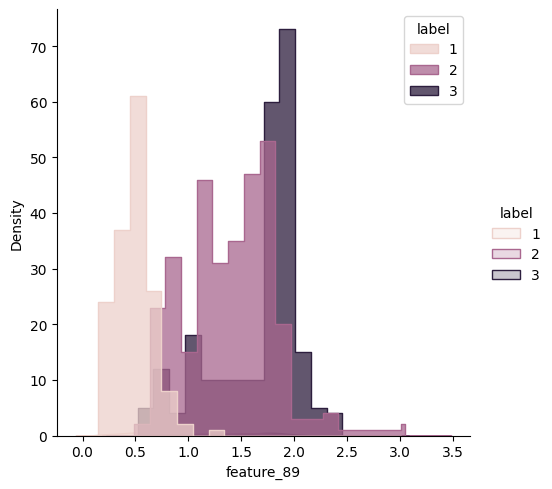

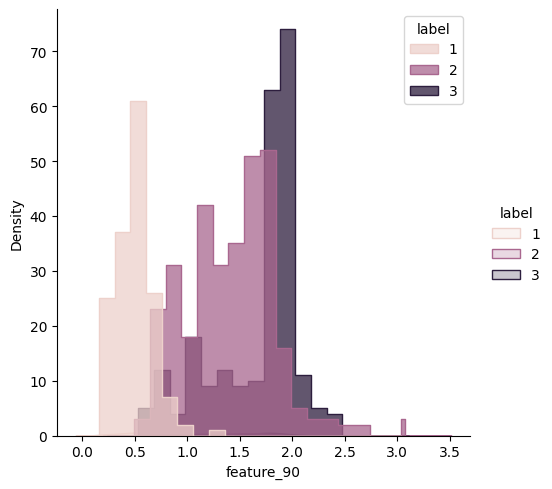

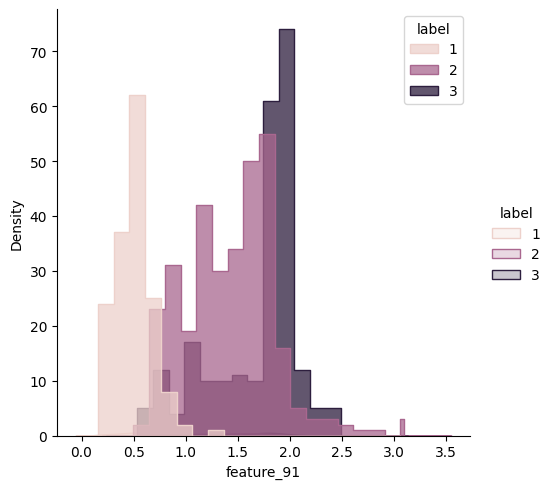

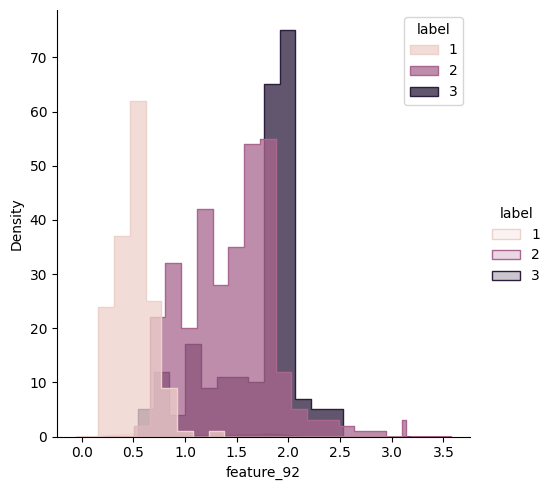

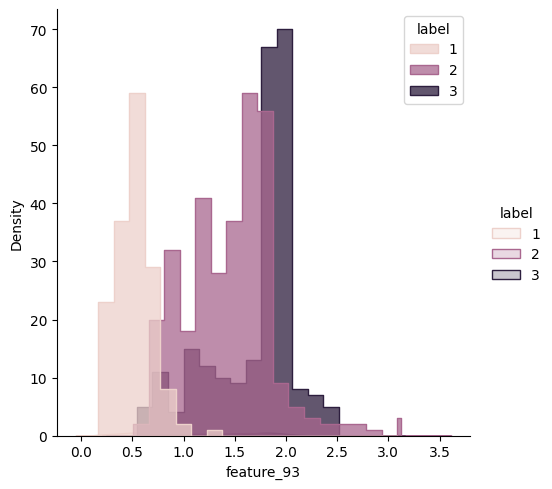

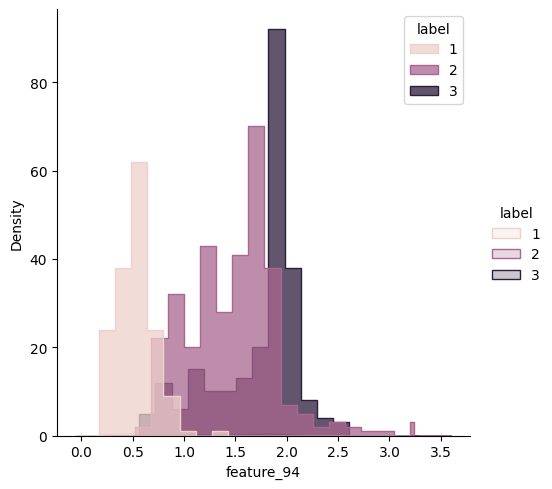

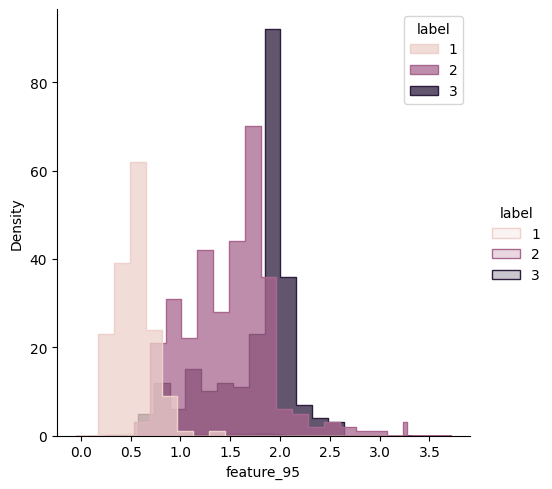

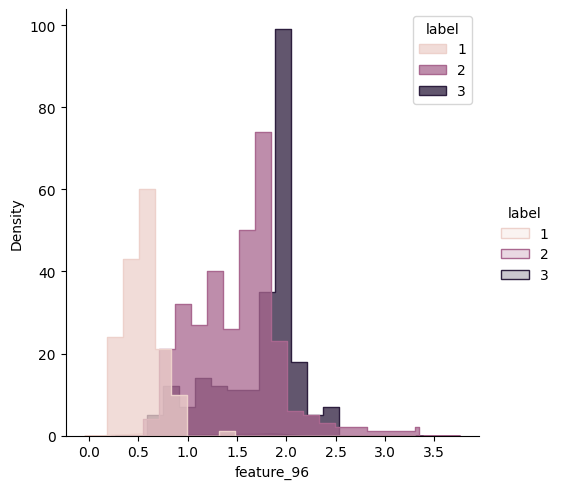

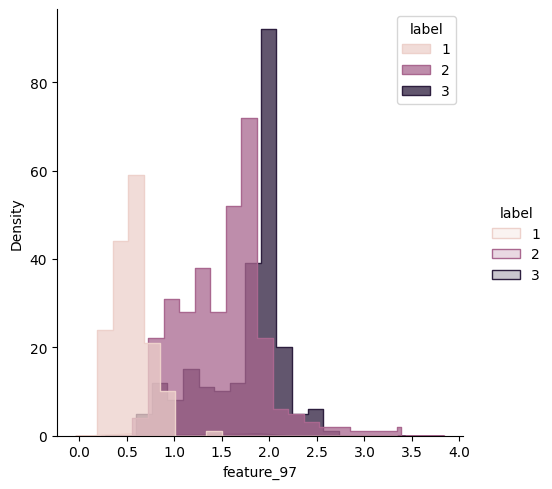

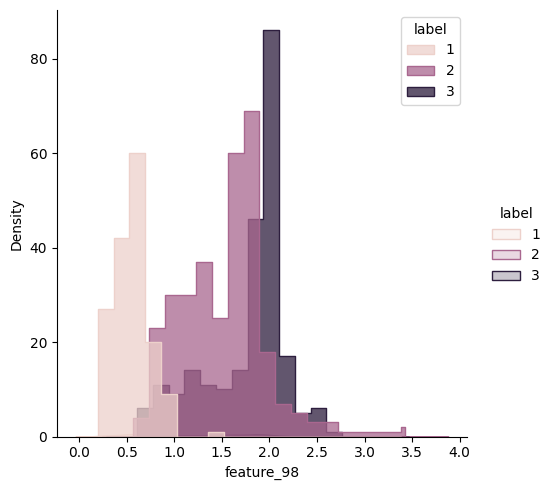

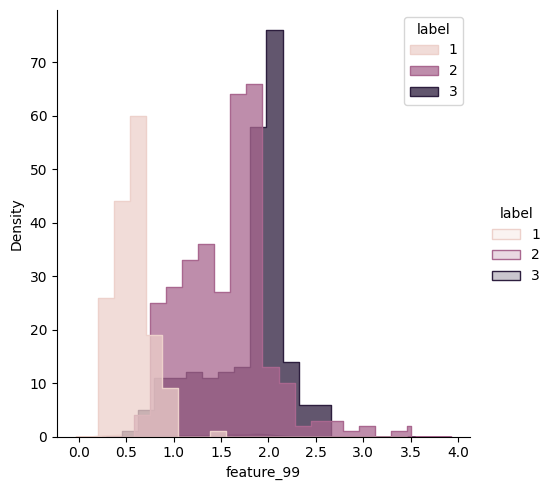

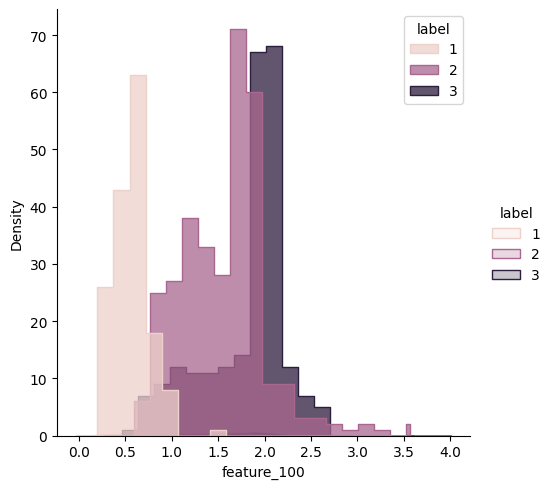

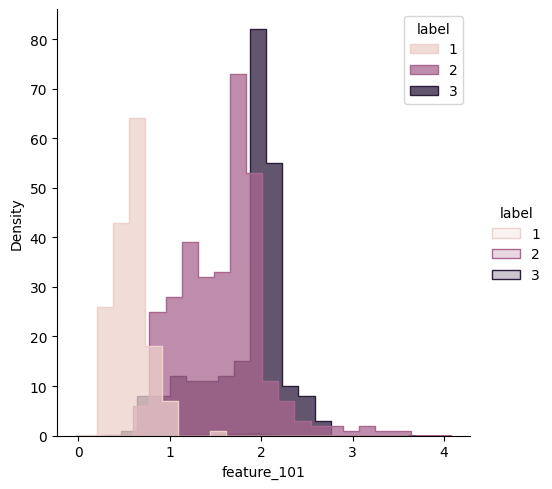

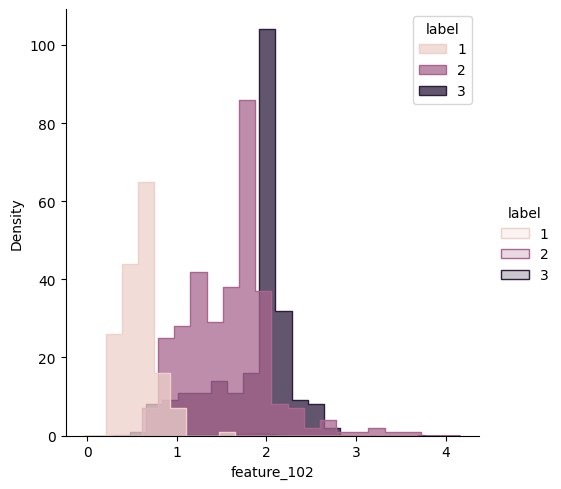

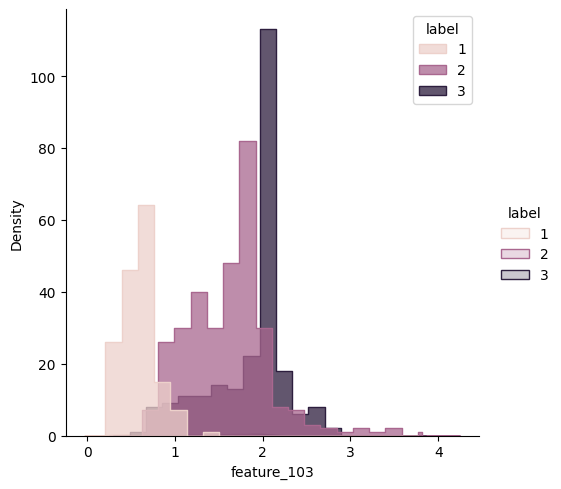

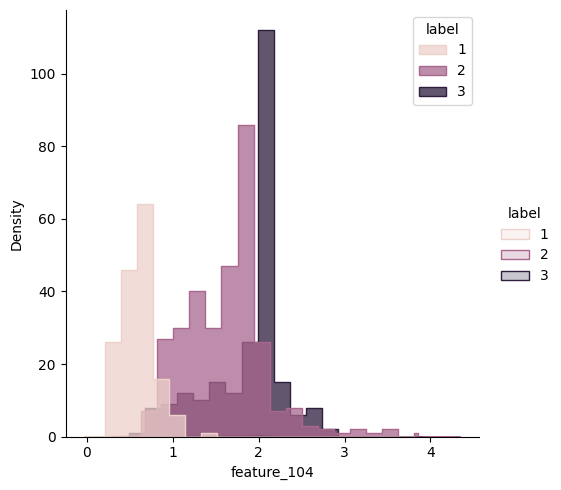

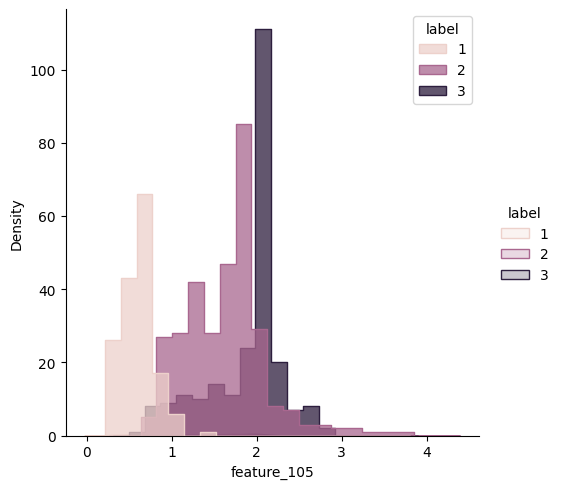

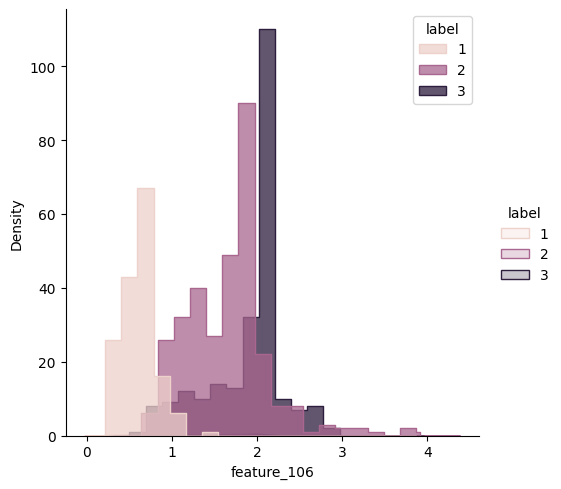

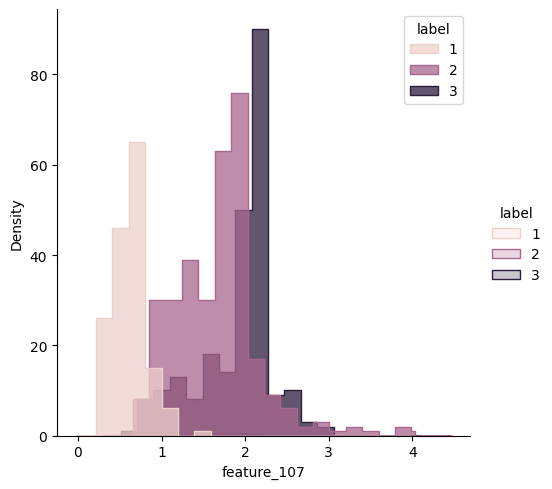

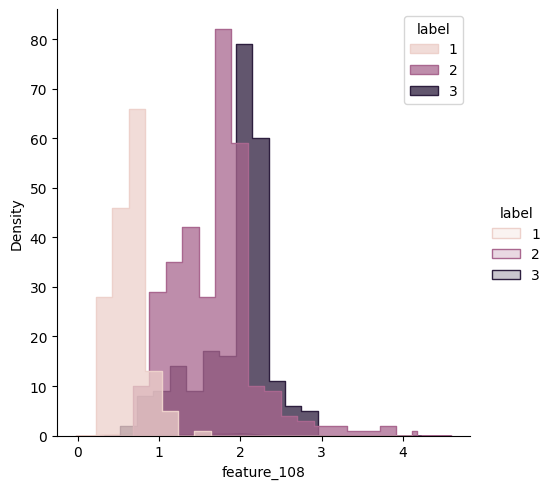

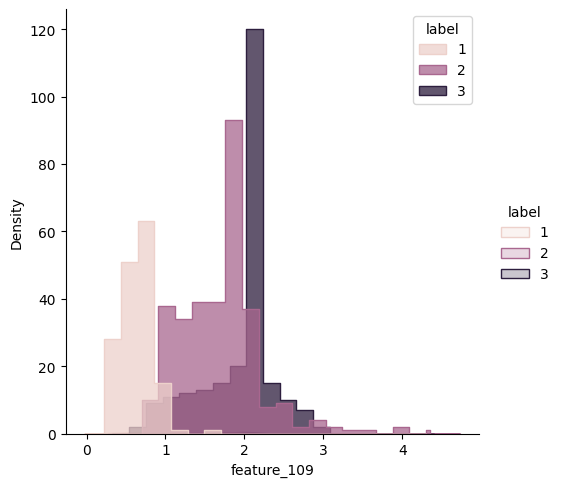

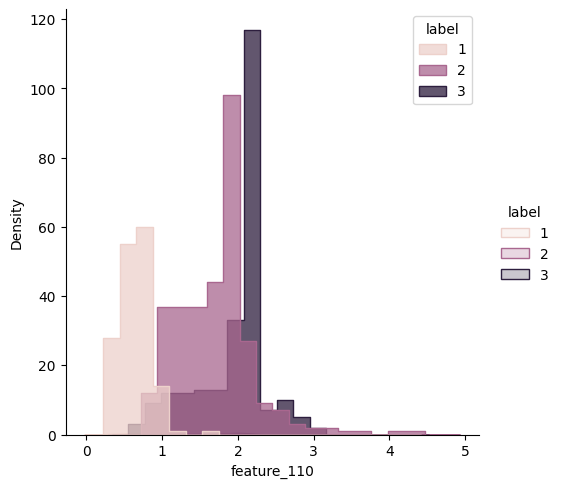

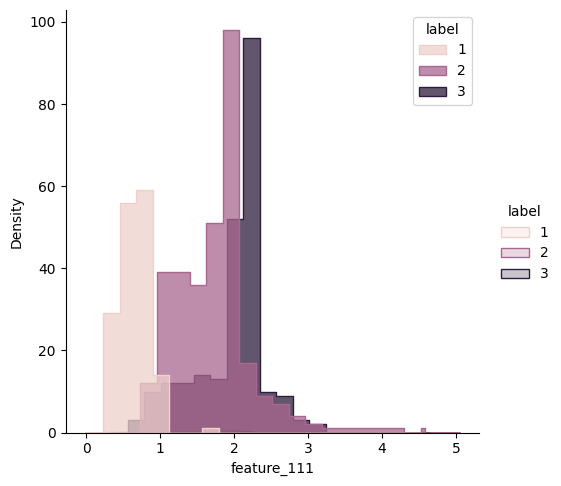

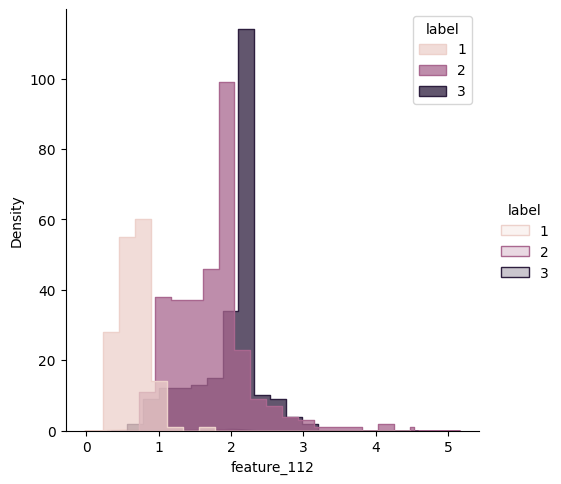

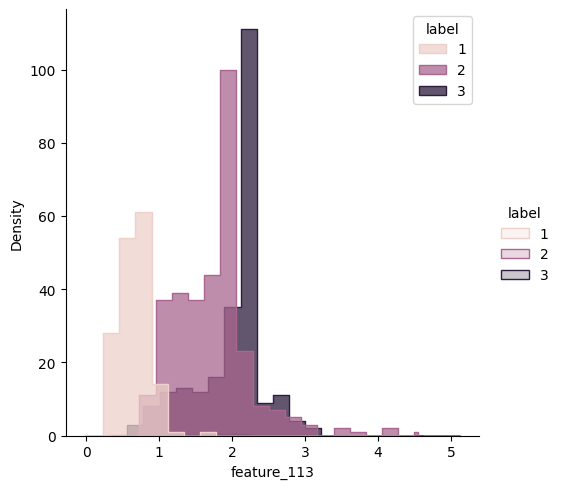

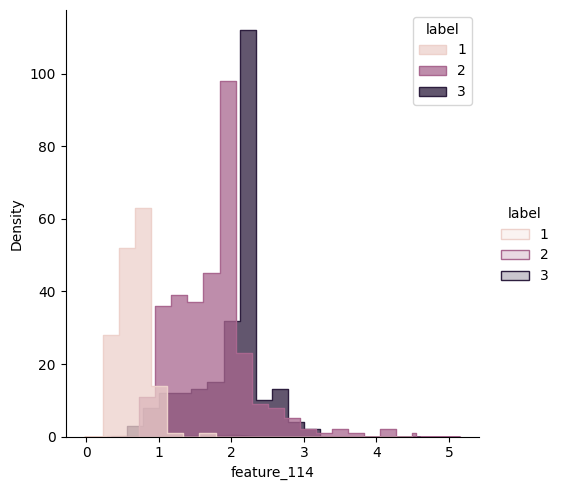

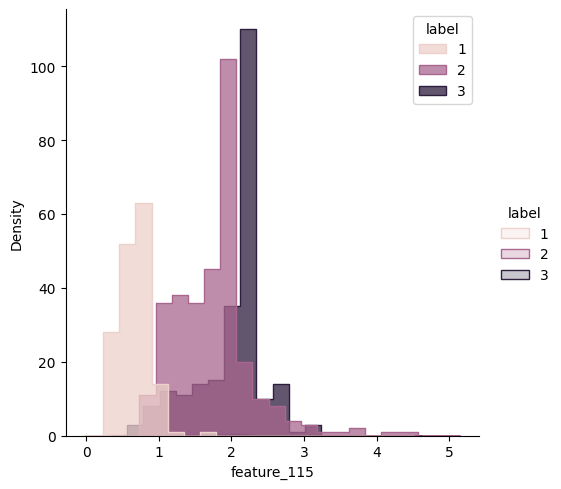

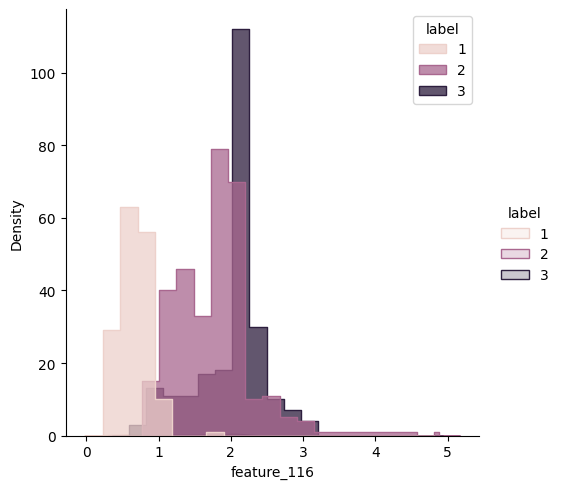

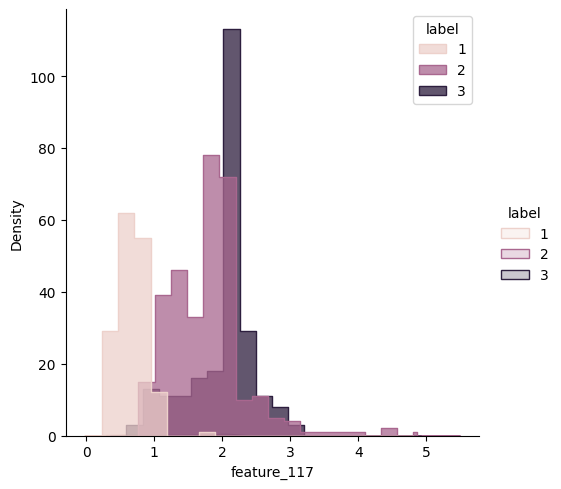

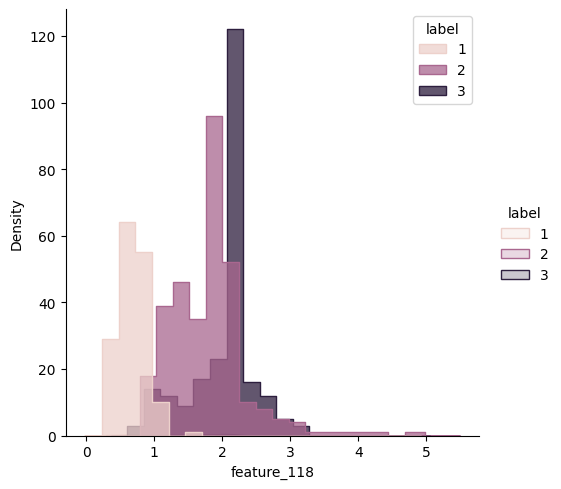

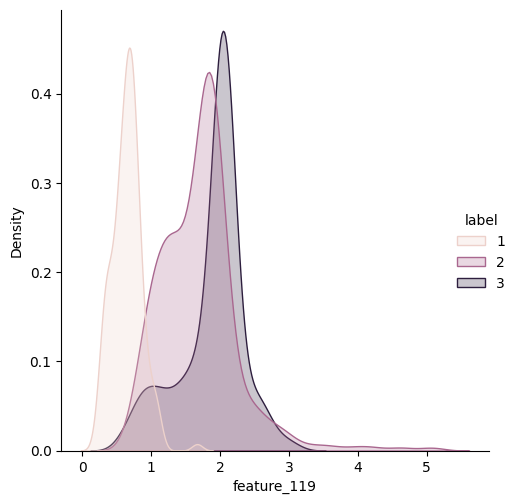

In [98]:
# seaborn plots (Rohit, 2014), (Anon, 2022)
# for each feature / wavelength - create displots
for i in range(1,434):
    plot = sns.histplot(df[[f'feature_{i}','label']], x=f'feature_{i}', hue='label', multiple='dodge', 
                        shrink=.75, bins=20, stat='count', element="step")
    plot.get_figure().savefig(f'feature_select/histoplots/feature_{i}_hist.png')

    plot = sns.displot(df[[f'feature_{i}','label']], x=f'feature_{i}', hue='label', multiple='layer', 
                    kind='kde', fill=True)
    plot.savefig(f'feature_select/histoplots/feature_{i}_kde.png')




In [47]:
# calculate correlation between features - from my ML CW1
corr_matrix = df.corr()
sortedCorrs = corr_matrix.reindex(corr_matrix.label.abs().sort_values(ascending=False).index)['label']
print(sortedCorrs)

dict = {}

for i in range(1,434):
    # feature and their correlation - to plot
    dict[i] = sortedCorrs[f"feature_{i}"]

dict

label          1.000000
feature_22     0.684880
feature_24     0.684414
feature_23     0.684239
feature_12     0.684147
                 ...   
feature_339   -0.017690
feature_335    0.016443
feature_338   -0.011414
feature_336    0.011051
feature_337    0.000667
Name: label, Length: 434, dtype: float64


{1: 0.6798540923102145,
 2: 0.6783922569132349,
 3: 0.6789645654099985,
 4: 0.6770879311609275,
 5: 0.6790586578163399,
 6: 0.6795775746221913,
 7: 0.6781557851871015,
 8: 0.678857017413054,
 9: 0.6820512886849636,
 10: 0.6829644614402837,
 11: 0.6828889482306638,
 12: 0.6841474849319031,
 13: 0.6837800538440627,
 14: 0.6826674209364006,
 15: 0.6818713107149805,
 16: 0.6793655842064682,
 17: 0.6806605583661615,
 18: 0.6807116224978818,
 19: 0.6820178616955728,
 20: 0.6822479369840342,
 21: 0.6836443666908557,
 22: 0.6848799231812757,
 23: 0.6842394446990052,
 24: 0.6844137781521796,
 25: 0.6832699051359747,
 26: 0.683489395218401,
 27: 0.6828923038589938,
 28: 0.6838409720416043,
 29: 0.6821145471793925,
 30: 0.6821785510136027,
 31: 0.682568706877141,
 32: 0.6818098335769984,
 33: 0.6769521992192811,
 34: 0.6758501154435663,
 35: 0.6771125786200022,
 36: 0.6767039907011706,
 37: 0.6756236064089713,
 38: 0.6732242653568415,
 39: 0.6732869887476829,
 40: 0.6721885073312238,
 41: 0.67219